✅ Dataset generado y guardado como 'dataset_100.csv'
✅ Datos cargados y divididos en entrenamiento/prueba


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

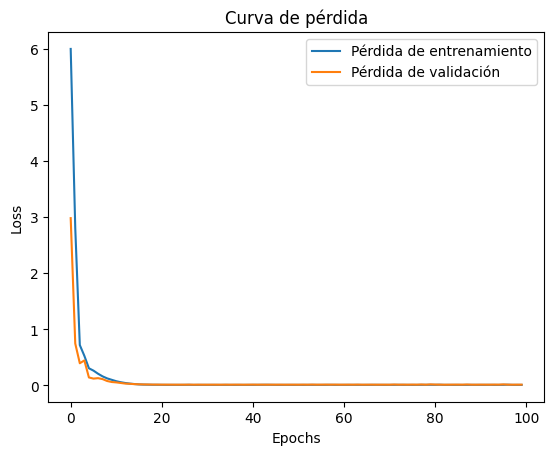

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
📊 Comparación de resultados (esperado vs predicho):

Entrada 1: x1=0.95, x2=0.74 | Esperado: 4.34 | Predicho: 4.41
Entrada 2: x1=0.55, x2=0.61 | Esperado: 2.89 | Predicho: 2.94
Entrada 3: x1=0.42, x2=0.25 | Esperado: 1.75 | Predicho: 1.77
Entrada 4: x1=0.36, x2=0.76 | Esperado: 2.58 | Predicho: 2.62
Entrada 5: x1=0.01, x2=0.12 | Esperado: 0.28 | Predicho: 0.44


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

X = np.random.rand(100, 2)
ruido = np.random.normal(0, 0.1, size=(100,))
y = 3 * X[:, 0] + 2 * X[:, 1] + ruido  # y = 3x1 + 2x2 + ruido

df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=["x1", "x2", "y"])
df.to_csv("dataset_100.csv", index=False)

print("✅ Dataset generado y guardado como 'dataset_100.csv'")
df.head()
from sklearn.model_selection import train_test_split

data = pd.read_csv("dataset_100.csv")

X = data[["x1", "x2"]].values
y = data["y"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Datos cargados y divididos en entrenamiento/prueba")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, input_dim=2, activation='relu'),  # Capa oculta 1 con 16 neuronas
    Dense(8, activation='relu'),                # Capa oculta 2 con 8 neuronas
    Dense(1)                                    # Capa de salida (regresión)
])

# Compilar con learning rate < 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Mostrar resumen del modelo
model.summary()
# Paso 4: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=0)

# Mostrar curva de pérdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Curva de pérdida")
plt.show()
# Paso 5: Hacer 5 predicciones con datos nuevos (no vistos)
X_nuevos = np.random.rand(5, 2)
y_esperado = 3 * X_nuevos[:, 0] + 2 * X_nuevos[:, 1]  # valores verdaderos (sin ruido)

# Predicciones del modelo
y_predicho = model.predict(X_nuevos).flatten()

# Mostrar comparaciones
print("📊 Comparación de resultados (esperado vs predicho):\n")
for i in range(5):
    entrada = X_nuevos[i]
    print(f"Entrada {i+1}: x1={entrada[0]:.2f}, x2={entrada[1]:.2f} | Esperado: {y_esperado[i]:.2f} | Predicho: {y_predicho[i]:.2f}")


